# Analysing ESG report using Natural Language Processing


## Summary
Environment, Social and Corporate Governance (ESG) refers to the three central factors in measuring the sustainability and societal impact of an investment in a company or business.  These criteria help to better determin the future financial performance of companies (return and risk).

This analysis extracts text from a ESG report in PDF format from the internet, performs NLP on these information, summaries the key ESG initiatives with WordClouds, TDIDFs and discovers topics by building a Latent Dirichlet Allocation (LDA) model.

Given that ESG is a broad topic.  Different companies focus on different aspects of ESG depending on their business operations and culture.  One can potentially ingest more ESG reports from different companies across all sectors and industries to capture relevant ESG topics.  This to be attempted in another analysis.

## Install Dependencies

In [1]:
!pip install PyPDF2
!pip install gensim
!pip install nltk
!pip install WordCloud
!pip install pdfminer3
!pip install mlflow
!pip3 install spacy
!pip3 install pyLDAvis==2.1.2

  Using cached mlflow-1.30.0-py3-none-any.whl (17.0 MB)
  Using cached GitPython-3.1.30-py3-none-any.whl (184 kB)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
  Using cached SQLAlchemy-1.4.46-cp37-cp37m-win_amd64.whl (1.6 MB)
  Using cached prometheus_flask_exporter-0.21.0-py3-none-any.whl (18 kB)
  Using cached waitress-2.1.2-py3-none-any.whl (57 kB)
  Using cached Flask-2.2.2-py3-none-any.whl (101 kB)
  Using cached databricks_cli-0.17.4-py3-none-any.whl
  Using cached docker-6.0.1-py3-none-any.whl (147 kB)
  Using cached cloudpickle-2.2.0-py3-none-any.whl (25 kB)
  Using cached alembic-1.9.1-py3-none-any.whl (210 kB)
  Using cached sqlparse-0.4.3-py3-none-any.whl (42 kB)
  Using cached protobuf-4.21.12-cp37-cp37m-win_amd64.whl (526 kB)
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached pywin32-305-cp37-cp37m-win_amd64.whl (12.2 MB)
  

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Anaconda3\\Lib\\site-packages\\win32\\_win32sysloader.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
!pip freeze

anaconda-client @ file:///C:/ci/anaconda-client_1635342757050/work
anaconda-navigator==2.2.0
anyio @ file:///C:/ci/anyio_1644463705902/work/dist
appdirs==1.4.4
argon2-cffi @ file:///C:/ci/argon2-cffi_1613038019788/work
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.functools-lru-cache @ file:///tmp/build/80754af9/backports.functools_lru_cache_1618170165463/work
backports.tempfile @ file:///home/linux1/recipes/ci/backports.tempfile_1610991236607/work
backports.weakref==1.0.post1
beautifulsoup4 @ file:///C:/ci/beautifulsoup4_1650292996413/work
bleach @ file:///opt/conda/conda-bld/bleach_1641577558959/work
blis==0.7.9
brotlipy==0.7.0
catalogue==2.0.8
certifi @ file:///C:/b/abs_85o_6fm0se/croot/certifi_1671487778835/work/certifi
cffi @ file:///C:/ci_310/cffi_1642682485096/work
chardet @ file:///C:/ci/chardet_1607706910910/work
charset-normalizer @ file:///tmp/build/80754af9/charset-normalizer_16300032

---
## Import Libraries

In [3]:
!pip install seaborn

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

import pandas as pd
import numpy as np

# pd.options.display.max_columns = 50
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 50)

plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':60})
plt.style.use('fivethirtyeight')

In [5]:
!pip install edge

In [6]:
import sys 
sys.path.append("\\COMPDrive\credit\20075503d\COMProfile\Desktop\src") 
from edge import *

ModuleNotFoundError: No module named 'edge'

In [7]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

# PDF text extraction
from pdfminer3.layout import LAParams, LTTextBox
from pdfminer3.pdfpage import PDFPage
from pdfminer3.pdfinterp import PDFResourceManager
from pdfminer3.pdfinterp import PDFPageInterpreter
from pdfminer3.converter import PDFPageAggregator
from pdfminer3.converter import TextConverter

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# Others
import requests
import io
import string
import re
from pprint import pprint
from tqdm.notebook import tqdm
import io

C:\Anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


Create Folders

In [8]:
import sys
import os
import shutil
DATA_FOLDER = '\\COMPDrive\credit\20075503d\COMProfile\Desktop\data'
def CreateFolder(in_dir):
    print('创建'+in_dir+'文件夹')
    isExists=os.path.exists(in_dir)
    if not isExists: #不存在则创建
        print('创建'+in_dir+'文件夹成功')
    else:
        print(in_dir+'文件夹已存在')
CreateFolder(DATA_FOLDER)

创建\COMPDrive\credit75503d\COMProfile\Desktop\data文件夹
创建\COMPDrive\credit75503d\COMProfile\Desktop\data文件夹成功


<>:4: DeprecationWarning: invalid escape sequence \c
<>:4: DeprecationWarning: invalid escape sequence \c
<>:4: DeprecationWarning: invalid escape sequence \c
C:\Users\20075008d\AppData\Local\Temp\ipykernel_13828\150261787.py:4: DeprecationWarning: invalid escape sequence \c
  DATA_FOLDER = '\\COMPDrive\credit\20075503d\COMProfile\Desktop\data'


### Loading Language Model

In [9]:
!pip install scikit-learn

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm", disable=['ner'])

[nltk_data] Downloading package punkt to \\COMPDrive\credit\20075008d\
[nltk_data]     COMProfile\AppData\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to \\COMPDrive\credit\200750
[nltk_data]     08d\COMProfile\AppData\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


### Preparing Stop Words

In [11]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS.union(stop_words)

In [12]:
', '.join(stop_words)

"of, are, everywhere, indeed, upon, system, cannot, through, the, its, same, several, would, therein, fifteen, must, anyone, towards, whereas, throughout, mustn, while, o, these, above, when, those, de, becoming, else, fill, meanwhile, since, became, how, often, isn, first, every, he, nine, forty, side, within, at, fifty, further, y, herein, then, about, seems, bill, everything, top, whatever, doesn, thus, to, twenty, becomes, as, etc, back, nor, empty, thereafter, anywhere, eg, being, twelve, per, during, by, see, few, cry, thick, thin, after, they, but, four, always, sincere, hence, not, thereupon, sometime, last, no, something, am, d, con, keep, many, which, our, behind, may, another, whom, have, otherwise, much, become, across, mightn, yours, an, them, also, seemed, you've, needn't, whoever, both, was, whereby, shan, won, please, one, that, although, call, around, she, yourselves, just, wouldn, move, you'll, most, yourself, without, you, onto, already, does, haven't, sometimes, her

## Report Details

Enter required information about the report.  Report must be in PDF format and downloadable from a URL.

1. Company Name
2. Company Ticker Symbol
3. Year of the Report
4. URL of the Report

In [89]:
report_company = 'Amazon'
report_ticker = 'AMZN'
report_year = '2022'
report_url = 'https://sustainability.aboutamazon.com/2021-sustainability-report.pdf'

Additional information - ESG Score from Yahoo Finance

In [90]:
!pip install yfinance
import yfinance as yf

ticker_info = yf.Ticker(report_ticker)
esg_data = pd.DataFrame(ticker_info.sustainability)
esg_data.columns = [str(ticker_info.ticker)]

esg_data.loc[['totalEsg','socialScore','governanceScore','environmentScore',
              'esgPerformance','percentile','peerGroup','highestControversy'],:]

,AMZN
2022-8,
totalEsg,30.28
socialScore,14.8
governanceScore,9.89
environmentScore,5.59
esgPerformance,OUT_PERF
percentile,64.44
peerGroup,Retailing
highestControversy,3


## Text Extraction
Extract information from the PDF report.  This process may take some time.  Do be patient.

*You may skip to the last step of this section if you have previously extracted the contents and stored in a json file.*

In [91]:
def extract_pdf(file, verbose=False):
    
    if verbose:
        print('Processing {}'.format(file))

    try:
        resource_manager = PDFResourceManager()
        fake_file_handle = io.StringIO()
        codec = 'utf-8'
        laparams = LAParams()

        converter = TextConverter(resource_manager, fake_file_handle, codec=codec, laparams=laparams)
        page_interpreter = PDFPageInterpreter(resource_manager, converter)
        
        password = ""
        maxpages = 0
        caching = True
        pagenos = set()

        content = []

        for page in PDFPage.get_pages(file,
                                      pagenos, 
                                      maxpages=maxpages,
                                      password=password,
                                      caching=True,
                                      check_extractable=False):

            page_interpreter.process_page(page)

            content.append(fake_file_handle.getvalue())

            fake_file_handle.truncate(0)
            fake_file_handle.seek(0)        

        text = '##PAGE_BREAK##'.join(content)

        # close open handles
        converter.close()
        fake_file_handle.close()
        
        return text

    except Exception as e:
        print(e)

        # close open handles
        converter.close()
        fake_file_handle.close()

        return ""

In [92]:
def extract_content(url):
    """
    A simple user define function that, given a url, download PDF text content
    Parse PDF and return plain text version
    """
    headers={"User-Agent":"Mozilla/5.0"}

    try:
        # retrieve PDF binary stream
        r = requests.get(url, allow_redirects=True, headers=headers)
        
        # access pdf content
        text = extract_pdf(io.BytesIO(r.content))

        # return concatenated content
        return text

    except:
        return ""

In [93]:
report_content = extract_content(report_url)
report_content

'Delivering Progress\nEvery Day\n\nAmazon’s 2021 Sustainability Report\n\nPrime Air\n\n\x0c##PAGE_BREAK##2021 Sustainability Report       Introduction     I     Environment     I     Society     I     Governance     I     Appendix \n\n2  \n\nPrime Air\n\nAbout Amazon\n\nAbout This Report\n\nAmazon is guided by four principles: customer obsession \nrather than competitor focus, passion for invention, \ncommitment to operational excellence, and long-term \nthinking. We strive to be Earth’s most customer-centric \ncompany, Earth’s best employer, and Earth’s safest \nplace to work. Customer reviews, 1-Click shopping, \npersonalized recommendations, Prime, Fulfillment by \nAmazon, Amazon Web Services (AWS), Kindle Direct \nPublishing, Kindle, Career Choice, Fire tablets, Fire \nTV, Amazon Echo, Alexa, Just Walk Out technology, \nAmazon Studios, and The Climate Pledge are some of \nthe things pioneered by Amazon. We have more than \n1.6 million employees worldwide, with operations \nin Afric

Storing all information in a json file

In [94]:
!pip install simplejson
import json

In [95]:
report = {'company':report_company, 'year':report_year, 'ticker':report_ticker, 
          'url':report_url, 'content':report_content}
report

{'company': 'Amazon',
 'year': '2022',
 'ticker': 'AMZN',
 'url': 'https://sustainability.aboutamazon.com/2021-sustainability-report.pdf',
 'content': 'Delivering Progress\nEvery Day\n\nAmazon’s 2021 Sustainability Report\n\nPrime Air\n\n\x0c##PAGE_BREAK##2021 Sustainability Report       Introduction     I     Environment     I     Society     I     Governance     I     Appendix \n\n2  \n\nPrime Air\n\nAbout Amazon\n\nAbout This Report\n\nAmazon is guided by four principles: customer obsession \nrather than competitor focus, passion for invention, \ncommitment to operational excellence, and long-term \nthinking. We strive to be Earth’s most customer-centric \ncompany, Earth’s best employer, and Earth’s safest \nplace to work. Customer reviews, 1-Click shopping, \npersonalized recommendations, Prime, Fulfillment by \nAmazon, Amazon Web Services (AWS), Kindle Direct \nPublishing, Kindle, Career Choice, Fire tablets, Fire \nTV, Amazon Echo, Alexa, Just Walk Out technology, \nAmazon Studio

Reloading the json file when required

In [96]:
DATA_FOLDER

'\\COMPDrive\\credit\x8075503d\\COMProfile\\Desktop\\data'

In [97]:
with open('ABT.json', "w") as outfile:  
    json.dump(report, outfile)

In [98]:
with open('ABT.json') as inputfile:
     report = json.load(inputfile)

---

## Natural Language Processing

### Extracting content by pages and sentences

1. Only properly structured sentences are extracted.  Sentences that start with a Capital Letter and ends with a period.  Sentences that are less than 10 words or more than 50 words are ignored.  
2. Pages with less than 500 words are excluded from extraction.  Would like to focus on pages with mostly text content.  This should exclude pages like cover and last page.  It should also exclude pages that are more graphical with short notes and comments.

In [99]:
def run_NLP(content):

    def sent_to_words(sentences):
        for sentence in sentences:
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

    # Define functions for stopwords, bigrams, trigrams and lemmatization
    def remove_stopwords(texts):
        return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

    def make_bigrams(texts):
        return [bigram_mod[doc] for doc in texts]

    def make_trigrams(texts):
        return [trigram_mod[bigram_mod[doc]] for doc in texts]

    def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
        """https://spacy.io/api/annotation"""
        texts_out = []
        for sent in texts:
            doc = nlp(" ".join(sent)) 
            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        return texts_out

    data_words = list(sent_to_words(content))

    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    # Remove Stop Words
    data_words_nostops = remove_stopwords(data_words)

    # Form Bigrams
    data_words_bigrams = make_bigrams(data_words_nostops)

    # Do lemmatization keeping only noun, adj, vb, adv
    data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    
    return data_lemmatized

In [100]:
report_pages, report_sentences = extract_sentences(nlp, report['content'])

On best effort basis, excluding header and footer contents that are not relevant.

In [101]:
headers = ['Contents Our Approach to ESG Solutions for Impact How We Do Business Appendices', 'Citi 2019 ESG Report']

for header in headers:
    report_pages = [p.replace(header, "").strip() for p in report_pages]
    report_sentences = [p.replace(header, "").strip() for p in report_sentences]    

### Tokenization, Bigrams and Lemmatization

In [102]:
def run_NLP(content):

    def sent_to_words(sentences):
        for sentence in sentences:
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

    # Define functions for stopwords, bigrams, trigrams and lemmatization
    def remove_stopwords(texts):
        return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

    def make_bigrams(texts):
        return [bigram_mod[doc] for doc in texts]

    def make_trigrams(texts):
        return [trigram_mod[bigram_mod[doc]] for doc in texts]

    def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
        """https://spacy.io/api/annotation"""
        texts_out = []
        for sent in texts:
            doc = nlp(" ".join(sent)) 
            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        return texts_out

    data_words = list(sent_to_words(content))

    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    # Remove Stop Words
    data_words_nostops = remove_stopwords(data_words)

    # Form Bigrams
    data_words_bigrams = make_bigrams(data_words_nostops)

    # Do lemmatization keeping only noun, adj, vb, adv
    data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    
    return data_lemmatized

Using full text content in a page rather than full text content in a sentence here.  A page defined as a document as per TFIDF calculation.  

In [103]:
data_lemmatized = run_NLP(report_pages)

In [104]:
report_sentences_lemma = [' '.join(w) for w in data_lemmatized]

In [105]:
import random

report_sentences_lemma[random.randint(0, len(report_sentences_lemma))]

'sustainability introduction_environment society_governance worker_voice mechanism criterion develop set worker_voice criterion outline key expectation drive best_practice supplier service provider implement maintain worker_voice mechanism criterion draw ungps worker engagement support technology principle internationally recognize human_right align mechanism worker inclusive worker worker input mechanism design performance particularly worker_voice mechanism resolve issue privacy ensure mechanism cause harm worker mechanism adequate safeguard place provide worker notice datum protect equitable accessible mechanism accommodate diversity ensure worker reasonable access information advice expertise necessary engage mechanism worker face particular barrier language literacy disability adequate assistance transparent predictable mechanism provide user clear procedure set expectation time frame outcome monitor stakeholder inform mechanism effectiveness source continuous learn new mechanism 

Relevant sentences are now well defined for ESG corpus.

### Word Cloud - Corpus Wide Term Frequencies

In [106]:
# context specific keywords not to include in topic modelling
fsi_stop_words = [
  'plc', 'group', 'target',
  'track', 'capital', 'holding',
  'report', 'annualreport',
  'esg', 'bank', 'report',
  'annualreport', 'long', 'make'
]

fsi_stop_words.append(report_company)
fsi_stop_words.append('apple')

# our list contains all english stop words + companies names + specific keywords
stop_words = stop_words.union(fsi_stop_words)

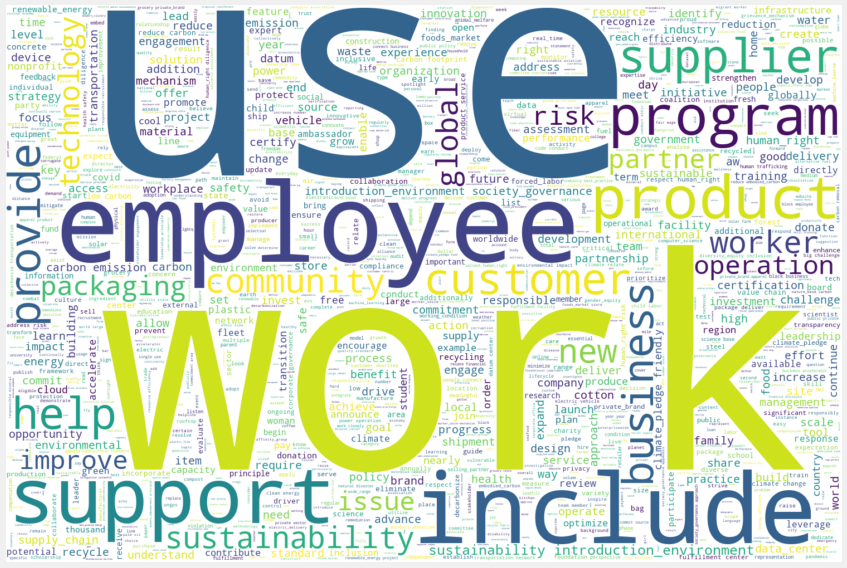

In [107]:
from wordcloud import WordCloud

# aggregate all 7200 records into one large string to run wordcloud on term frequency
large_string = ' '.join(report_sentences_lemma)

# use 3rd party lib to compute term freq., apply stop words
word_cloud = WordCloud(
    background_color="white",
    max_words=5000, 
    width=1500, 
    height=1000, 
    stopwords=stop_words, 
    contour_width=3, 
    contour_color='steelblue'
)

# display our wordcloud across all records
plt.figure(figsize=(16,16))
word_cloud.generate(large_string)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### TFIDF - Unigram and Bigram Analysis

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Run bi-gram TF-IDF frequencies
bigram_tf_idf_vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2), min_df=1, use_idf=True)

In [109]:
report_sentences_lemma

['sustainability introduction_environment society_governance guide principle customer obsession competitor focus passion invention commitment operational excellence term think strive earth customer centric company earth good employer earth safe place work customer review click shop personalize recommendation prime fulfillment service direct kindle career choice tablet tv echo walk technology amazon studio climate_pledge thing pioneer amazon employee worldwide symbol link direct website link link download look common abbreviation awsamazon web service ununite nation organization carbon dioxide dioxide equivalent amazon commit invest sustainability win aroundit good planet business customer communitie sustainability build sustainability progress found climate_pledge announce commitment achieve carbon emission business include work wide_range amazon commitment initiative support employee partner community operate world financial figure report dollar state note datum primarily reflect prog

In [110]:
bigram_tf_idf = bigram_tf_idf_vectorizer.fit_transform(report_sentences_lemma)

In [111]:
# Extract bi-grams names
words = bigram_tf_idf_vectorizer.get_feature_names()

# extract our top 10 ngrams
total_counts = np.zeros(len(words))
for t in bigram_tf_idf:
    total_counts += t.toarray()[0]

count_dict = (zip(words, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))

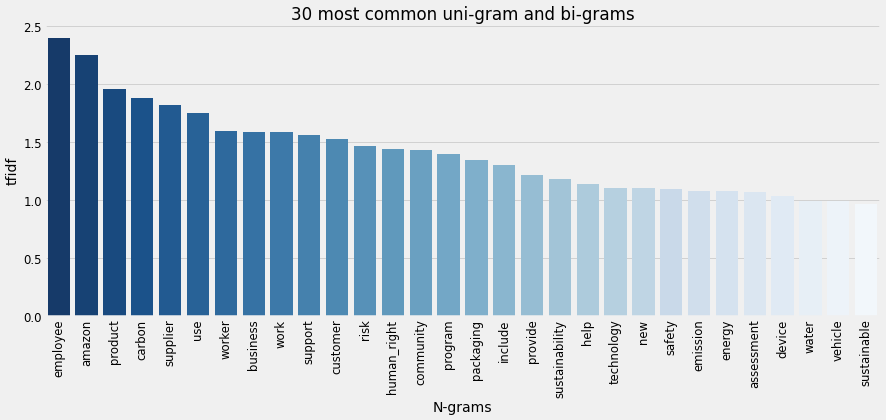

In [112]:
# Plot top 10 ngrams
plt.figure(figsize=(16, 6))
plt.subplot(title='30 most common uni-gram and bi-grams')
sns.barplot(x=x_pos,y=counts,palette='Blues_r')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('N-grams')
plt.ylabel('tfidf')
plt.show()

---


## Topic Modeling and Latent Dirichlet Allocation (LDA)

Evaluaton Metrics
1. **Perplexity**: Captures how surprised a model is of new data it has not seen before, and is measured as the normalized log-likelihood of a held-out test set.  Lower the better.
2. **Coherence Score**: Measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic.  Higher the better.

In the analysis, the model with the highest coherence score is selected as the optimal model.

In [113]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [114]:
!pip install ipywidgets

In [115]:
!pip install tqdm

In [116]:
results = []
optimal_score = 0
optimal_model = None

for num_of_topics in tqdm(range(2,15,1)):
    
    result = {}
    
    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=num_of_topics, 
                                                random_state=42,
                                                update_every=1,
                                                chunksize=5,
                                                passes=20,
                                                alpha='auto',
                                                per_word_topics=True) 

    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    if optimal_score < coherence_model_lda.get_coherence():
        optimal_score = coherence_model_lda.get_coherence()
        optimal_model = lda_model

    result['num_of_topics'] = num_of_topics
    result['perplexity'] = lda_model.log_perplexity(corpus)
    result['coherence_score'] = coherence_model_lda.get_coherence()
    
    results.append(result)
    
results = pd.DataFrame(results)  
results.set_index('num_of_topics', inplace=True) 

  0%|          | 0/13 [00:00<?, ?it/s]

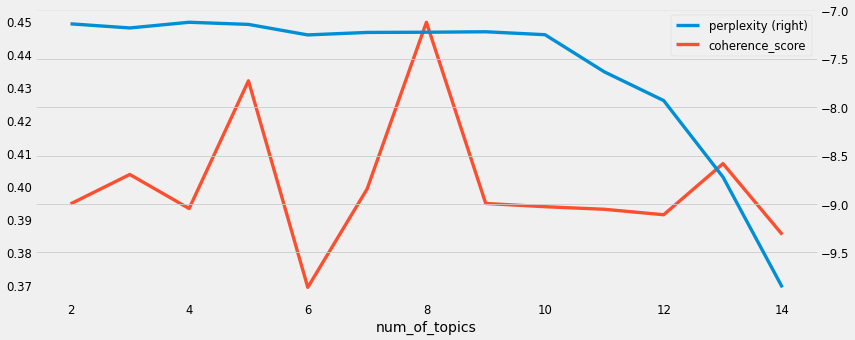

In [117]:
results.plot(secondary_y='perplexity')
plt.show()

In [118]:
results

,perplexity,coherence_score
num_of_topics,,
2,-7.139728,0.394721
3,-7.182374,0.403650
4,-7.123635,0.393325
5,-7.145766,0.432039
6,-7.254305,0.369438
7,-7.228561,0.399251
8,-7.226536,0.449774
9,-7.221703,0.394863
10,-7.252080,0.393876


In [119]:
# Compute Perplexity
print('\nPerplexity of the Optimal Model: ', optimal_model.log_perplexity(corpus))  

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=optimal_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score of the Optimal Model: ', coherence_lda)


Perplexity of the Optimal Model:  -7.226535864999886

Coherence Score of the Optimal Model:  0.4497742648746092


---

## Visualize the topics

In [120]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word, mds='mmds')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.167037  0.263557       1        1  39.605980
6     -0.285006  0.031090       2        1  21.078693
0      0.125515  0.254754       3        1  18.925939
3      0.322866  0.033615       4        1  14.158953
7     -0.111034 -0.237246       5        1   3.328956
5      0.100749 -0.208345       6        1   2.713118
2      0.011882 -0.070429       7        1   0.187136
1      0.002066 -0.066995       8        1   0.001224, topic_info=              Term        Freq       Total Category  logprob  loglift
115        product  140.000000  140.000000  Default  30.0000  30.0000
15          carbon   88.000000   88.000000  Default  29.0000  29.0000
141       supplier  114.000000  114.000000  Default  28.0000  28.0000
101      packaging   59.000000   59.000000  Default  27.0000  27.0000
21         climate   45.000000   45.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
1779   fundamental    0.000077    4.984012   Topic8  -7.9032   0.2381
1780  human_rights    0.000077    2.247518   Topic8  -7.9032   1.0345
1781   inclusivity    0.000077    2.247518   Topic8  -7.9032   1.0345
1782     indicator    0.000077    2.247518   Topic8  -7.9032   1.0345
1783      interest    0.000077    6.715587   Topic8  -7.9032  -0.0601

[393 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
379       1  0.346847  access
379       2  0.485586  access
379       3  0.161862  access
170       1  0.995198  action
841       6  0.657079     add
...     ...       ...     ...
163       1  0.218077   world
163       2  0.773183   world
376       1  0.383971    year
376       2  0.485017    year
376       4  0.141463    year

[373 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 1, 4, 8, 6, 3, 2])

In [121]:
# Print the Keyword in the 10 topics
pprint(optimal_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.037*"product" + 0.024*"amazon" + 0.021*"customer" + 0.018*"packaging" + '
  '0.015*"use" + 0.015*"program" + 0.015*"material" + 0.013*"sustainability" + '
  '0.012*"recycle" + 0.011*"device"'),
 (1,
  '0.000*"ungps" + 0.000*"victim" + 0.000*"salient" + '
  '0.000*"social_responsibility" + 0.000*"stakeholder" + 0.000*"strong" + '
  '0.000*"training" + 0.000*"transparency" + 0.000*"treat" + 0.000*"relevant"'),
 (2,
  '0.007*"inequity" + 0.006*"spouse" + 0.006*"bias" + 0.005*"college" + '
  '0.003*"apprenti" + 0.003*"disrupt" + 0.003*"hopper" + 0.003*"higher" + '
  '0.003*"grace" + 0.003*"afrotech"'),
 (3,
  '0.036*"carbon" + 0.019*"energy" + 0.019*"climate" + 0.017*"emission" + '
  '0.016*"use" + 0.016*"reduce" + 0.014*"public" + 0.013*"operation" + '
  '0.011*"sustainability" + 0.011*"transportation"'),
 (4,
  '0.017*"supplier" + 0.016*"business" + 0.015*"amazon" + 0.015*"work" + '
  '0.012*"risk" + 0.012*"worker" + 0.011*"include" + 0.010*"employee" + '
  '0.010*"issue" + 0.0

---

## Distinguishing the different ESG topics

In [122]:
topic_names = {0: 'support community', 1: 'value employees'}

#     'value employees',
#     'ethical investments',
#     'strong governance',
#     'focus customer',    
#     'green energy',
#     'support community',
#     'code of conduct',
#     'sustainable finance',
#     'company transformation',


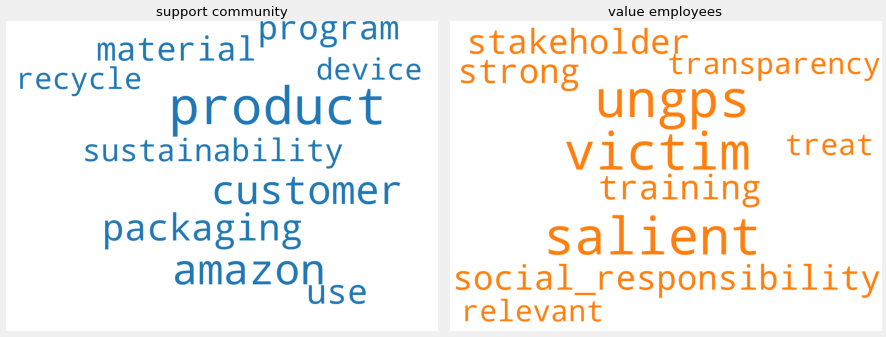

In [123]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=50,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title(topic_names[i], fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Closing Notes
1. This is only a simple analysis that studies the ESG topics in only one ESG report.  This study can be extended to more reports issued by the many companies across different sectors and industries.
2. We can expect the number of topics to increase when more ESG reports are included in the study.
3. Once relevant ESG topics are identified, then we can potentially calculate ESG scores by topics for all companies.  Then we can assess and see whether such ESG score derived through NLP process correlates with the score given by rating agencies downloaded from yahoo finance.